![alt_text](http://www.gtec.at/var/plain_site/storage/images/media/images/g.nautilus-g.kids-400x240/351775-1-eng-GB/g.Nautilus-g.Kids-400x240.jpg 'Child having an EEG test done')

# Welcome to the EEG Tutorial!
#### By the end of this tutorial, you will be able to...

_1. Understand what an EEG is._

_2. Recognize the five different brain waves and when they occur._

_3. Examine your own brain data!_

---

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle the code."></form>''')

In [2]:
from IPython.display import Javascript
Javascript('IPython.notebook.execute_cells_below()')

<IPython.core.display.Javascript object>

## So, what is an EEG and why should we be learning about it?

EEG stands for __electroencephalogram__, which is a test that records the electrical signals produced by the brain. Our brain cells communicate using electrical signals, and we can measure some of these signals using special electrodes (like the ones the children are wearing in the image above). A signal may be classified by its __frequency__ (number of peaks measured per second) and __amplitude__ (the strength of each peak).

![alt_text](https://i1.wp.com/www.mindovermenieres.com/wp-content/uploads/2015/12/brainwave-chart-01.png?w=600 "Types of EEG Waves")

---

## That's cool, but what do these waves _mean_? 

Each of the five waves listed above represent a different brain __state__. For example, the __delta__ waves are observed when a person is in __deep sleep__. The short video below will explain each wave and the brain state associated with it:

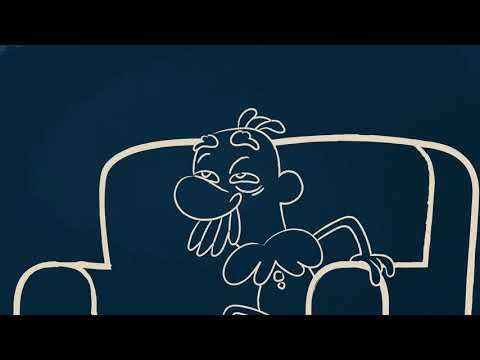

In [3]:
from IPython.display import YouTubeVideo
# a short video about brain waves
# Video credit: Brainfacts.org.
YouTubeVideo('8CejGESrRkc')

---

## Why are EEG tests important? What's the point?

An EEG test is capable of detecting brain disorders such as __seizures__, __dizziness__, __epilepsy__, and even __brain tumors__. Many disorders are detected by noting an abnormal spike/pattern in the brain waves as they're being measured. The following image shows normal brain wave activity followed by brain wave activity during a seizure:

![alt_text](http://rrapid.leeds.ac.uk/ebook/assets/images/illustrations/EEG.png 'Seizure EEG')

---

## Awesome, when can I look at _my_ brain waves?

Right now! We probably won't see any __delta__ or __theta__ waves (unless you were very committed and _fell asleep_ while taking measurements), but if you closed your eyes and relaxed at any point, you may catch an __alpha__ wave somewhere in your data! Or, if you were _really_ deep in thought or focused on a problem, you could even find a __gamma__ wave!

Below you will see a prompt that will ask you to enter the name of your EEG file. Be sure to enter the file name _without_ the '.txt' and press [ENTER]. 

After you enter your file name, four plots (one for each of the electrodes you placed on your head) will appear below. Each plot has __three__ sliders:
    (1) __w1__ represents the minimum x value for the plot
    (2) __w2__ represents the maximum x value for the plot
    (3) __h__ represents the y range for the plot (-h, h)
    
    NOTE: w2 must be larger than w1 for the plot to work!
    
Each plot will automatically update as you move any of the sliders. The minimum and maximum points on each wave have been marked for you and will update as well.

If you're feeling extra adventurous, click the button at the top of this notebook that says 'Click here to toggle the code.' to show all the code used to create this notebook. You can modify this code if you wish to add any features to the plots, change the colors, etc.

If you wish to __start over__ with a new EEG file, simply click the 'Reset' button.

#### Good luck and enjoy the _waves_!

---


In [33]:
from IPython.display import Javascript, display
from ipywidgets import widgets

def run_all(ev):
    display(Javascript('IPython.notebook.execute_cells_below()'))

button = widgets.Button(description="Reset")
button.on_click(run_all)
display(button)

<IPython.core.display.Javascript object>

Button(description='Reset', style=ButtonStyle())

In [ ]:
file_name = str(input("Please enter the name of your EEG data file without the '.txt' (ex. EEG_data) and press [ENTER]: "))
print('The file name you entered is: %s' %file_name)

---

## --- Left Frontal Lobe ---

In [ ]:
# Let's begin by importing our libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import *
from shutil import copyfile 
import os
import warnings
warnings.filterwarnings("ignore")

# ...And reading in our data:
# We want to skip the first 6 rows since they contain comments
# and we want to give our data some column labels:
headers = ['Index','EEG_1','EEG_2','EEG_3','EEG_4','ACC_1','ACC_2','ACC_3','Timestamp_1','Timestamp_2']

# Make a copy of the user's text data and make it into a .csv file for them
copyfile(file_name + '.txt', file_name + '_copy.txt')

os.rename(file_name + '_copy.txt', file_name + '.csv')

eeg_data = pd.read_csv(file_name + '.csv',skiprows=[0,1,2,3,4,5],names=headers)

# Uncomment the line below to print a preview of the data
#print(eeg_data)

In [ ]:
# Left Frontal Lobe Data ---

eeg_data_1 = eeg_data['EEG_1']
eeg_index = np.arange(0,len(eeg_data_1) + 1)

# This is the function that will run whenever we move one of our sliders:
def update(w1=0,w2=0,h=0):
    
    # We want to update our x and y values for our plot first...
    x = eeg_index[w1:w2]
    y = eeg_data_1[w1:w2]
    
    # Now, let's update the minimum and maximum values for the portion of the plot we're viewing now...
    max_val = np.max(y)
    max_val_x = np.argmax(y)
    min_val = np.min(y)
    min_val_x = np.argmin(y)
    
    # Here's our plot code...
    plt.figure()
    plt.grid()
    
    plt.xlim([w1,w2])
    plt.ylim([-1*h,h])
    
    plt.xlabel('Sample #')
    plt.ylabel('Voltage (V) [uV]')
    plt.title('Left Frontal Lobe')
    
    plt.plot(x,y,'b')
    plt.plot(min_val_x,min_val,'Xk')
    plt.plot(max_val_x,max_val,'Xk')
    
    plt.show()
    
    # Now, let's print out what the minimum and maximum points are:
    print('Minimum point is (%.2f,%.2f)' %(min_val_x,min_val))
    print('Maximum point is (%.2f,%.2f)' %(max_val_x,max_val))

# Now that we have our plot set up, we can set up our sliders so that we can view 
# different parts of our EEG data:
interact(update, w1 = widgets.IntSlider(value=1, min=0, max=len(eeg_data_1), step=1) , 
                 w2 = widgets.IntSlider(value=1, min=200, max=len(eeg_data_1), step=1) ,
                 h = widgets.IntSlider(value=1, min=1000, max=10000, step=1) )

## INSTRUCTIONS FOR THE INTERACTIVE PLOT:
## Move the 'w1' slider to adjust the starting x value limit for the plot
## Move the 'w2' slider to adjust the final x value limit for the plot
## Move the 'h' slider to adjust the y axis limits

## Make sure the value of 'w2' is GREATER than 'w1'
## You should see two black 'X's that mark the minimum and maximum points on the graph--
##    if you don't see these points, try adjusting the 'h' slider

---

## --- Right Frontal Lobe ---

In [ ]:
# Right Frontal Lobe Data ---

eeg_data_2 = eeg_data['EEG_2']

# This is the function that will run whenever we move one of our sliders:
def update(w1=0,w2=0,h=0):
    
    # We want to update our x and y values for our plot first...
    x = eeg_index[w1:w2]
    y = eeg_data_2[w1:w2]
    
    # Now, let's update the minimum and maximum values for the portion of the plot we're viewing now...
    max_val = np.max(y)
    max_val_x = np.argmax(y)
    min_val = np.min(y)
    min_val_x = np.argmin(y)
    
    # Here's our plot code...
    plt.figure()
    plt.grid()
    
    plt.xlim([w1,w2])
    plt.ylim([-1*h,h])
    
    plt.xlabel('Sample #')
    plt.ylabel('Voltage (V) [uV]')
    plt.title('Right Frontal Lobe')
    
    plt.plot(x,y,'r')
    plt.plot(min_val_x,min_val,'Xk')
    plt.plot(max_val_x,max_val,'Xk')
    
    plt.show()
    
    # Now, let's print out what the minimum and maximum points are:
    print('Minimum point is (%.2f,%.2f)' %(min_val_x,min_val))
    print('Maximum point is (%.2f,%.2f)' %(max_val_x,max_val))

# Now that we have our plot set up, we can set up our sliders so that we can view 
# different parts of our EEG data:
interact(update, w1= widgets.IntSlider(value=1, min=0, max=len(eeg_data_2), step=1) , 
                 w2 = widgets.IntSlider(value=1, min=200, max=len(eeg_data_2), step=1) ,
                 h= widgets.IntSlider(value=1, min=1000, max=10000, step=1) );

## INSTRUCTIONS FOR THE INTERACTIVE PLOT:
## Move the 'w1' slider to adjust the starting x value limit for the plot
## Move the 'w2' slider to adjust the final x value limit for the plot
## Move the 'h' slider to adjust the y axis limits

## Make sure the value of 'w2' is GREATER than 'w1'
## You should see two black 'X's that mark the minimum and maximum points on the graph--
##    if you don't see these points, try adjusting the 'h' slider

---

## --- Left Occipital Lobe ---

In [ ]:
# Left Occipital Lobe Data ---

eeg_data_3 = eeg_data['EEG_3']

def update(w1=0,w2=0,h=0):
    
    # We want to update our x and y values for our plot first...
    x = eeg_index[w1:w2]
    y = eeg_data_3[w1:w2]
    
    # Now, let's update the minimum and maximum values for the portion of the plot we're viewing now...
    max_val = np.max(y)
    max_val_x = np.argmax(y)
    min_val = np.min(y)
    min_val_x = np.argmin(y)
    
    # Here's our plot code...
    plt.figure()
    plt.grid()
    
    plt.xlim([w1,w2])
    plt.ylim([-1*h,h])
    
    plt.xlabel('Sample #')
    plt.ylabel('Voltage (V) [uV]')
    plt.title('Left Occipital Lobe')
    
    plt.plot(x,y,'g')
    plt.plot(min_val_x,min_val,'Xk')
    plt.plot(max_val_x,max_val,'Xk')
    
    plt.show()
    
    # Now, let's print out what the minimum and maximum points are:
    print('Minimum point is (%.2f,%.2f)' %(min_val_x,min_val))
    print('Maximum point is (%.2f,%.2f)' %(max_val_x,max_val))

# Now that we have our plot set up, we can set up our sliders so that we can view 
# different parts of our EEG data:
interact(update, w1= widgets.IntSlider(value=1, min=0, max=len(eeg_data_3), step=1) , 
                 w2 = widgets.IntSlider(value=1, min=200, max=len(eeg_data_3), step=1) ,
                 h= widgets.IntSlider(value=1, min=1000, max=10000, step=1) );

## INSTRUCTIONS FOR THE INTERACTIVE PLOT:
## Move the 'w1' slider to adjust the starting x value limit for the plot
## Move the 'w2' slider to adjust the final x value limit for the plot
## Move the 'h' slider to adjust the y axis limits

## Make sure the value of 'w2' is GREATER than 'w1'
## You should see two black 'X's that mark the minimum and maximum points on the graph--
##    if you don't see these points, try adjusting the 'h' slider

---

## -- Right Occipital Lobe ---

In [ ]:
# Right Occipital Lobe Data ---

eeg_data_4 = eeg_data['EEG_4']

def update(w1=0,w2=0,h=0):
    
    # We want to update our x and y values for our plot first...
    x = eeg_index[w1:w2]
    y = eeg_data_4[w1:w2]
    
    # Now, let's update the minimum and maximum values for the portion of the plot we're viewing now...
    max_val = np.max(y)
    max_val_x = np.argmax(y)
    min_val = np.min(y)
    min_val_x = np.argmin(y)
    
    # Here's our plot code...
    plt.figure()
    plt.grid()
    
    plt.xlim([w1,w2])
    plt.ylim([-1*h,h])
    
    plt.xlabel('Sample #')
    plt.ylabel('Voltage (V) [uV]')
    plt.title('Right Occipital Lobe')
    
    plt.plot(x,y,'m')
    plt.plot(min_val_x,min_val,'Xk')
    plt.plot(max_val_x,max_val,'Xk')
    
    plt.show()
    
    # Now, let's print out what the minimum and maximum points are:
    print('Minimum point is (%.2f,%.2f)' %(min_val_x,min_val))
    print('Maximum point is (%.2f,%.2f)' %(max_val_x,max_val))

# Now that we have our plot set up, we can set up our sliders so that we can view 
# different parts of our EEG data:
interact(update, w1= widgets.IntSlider(value=1, min=0, max=len(eeg_data_4), step=1) , 
                 w2 = widgets.IntSlider(value=1, min=200, max=len(eeg_data_4), step=1) ,
                 h= widgets.IntSlider(value=1, min=1000, max=10000, step=1) );

## INSTRUCTIONS FOR THE INTERACTIVE PLOT:
## Move the 'w1' slider to adjust the starting x value limit for the plot
## Move the 'w2' slider to adjust the final x value limit for the plot
## Move the 'h' slider to adjust the y axis limits

## Make sure the value of 'w2' is GREATER than 'w1'
## You should see two black 'X's that mark the minimum and maximum points on the graph--
##    if you don't see these points, try adjusting the 'h' slider